In [2]:
import pandas as pd

df1 = pd.read_csv('social-media.csv')

print(df1.info())

df2 = pd.read_csv('Time-Wasters on Social Media.csv')

print(df2.info())

df3_csv = pd.read_csv('Social Media Excel Dataset.csv')

print(df3_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserId         63 non-null     int64 
 1   UsageDuraiton  63 non-null     int64 
 2   Age            63 non-null     int64 
 3   Country        63 non-null     object
 4   TotalLikes     63 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6  

array([[<Axes: xlabel='UserId', ylabel='UserId'>,
        <Axes: xlabel='UsageDuraiton', ylabel='UserId'>,
        <Axes: xlabel='Age', ylabel='UserId'>,
        <Axes: xlabel='TotalLikes', ylabel='UserId'>],
       [<Axes: xlabel='UserId', ylabel='UsageDuraiton'>,
        <Axes: xlabel='UsageDuraiton', ylabel='UsageDuraiton'>,
        <Axes: xlabel='Age', ylabel='UsageDuraiton'>,
        <Axes: xlabel='TotalLikes', ylabel='UsageDuraiton'>],
       [<Axes: xlabel='UserId', ylabel='Age'>,
        <Axes: xlabel='UsageDuraiton', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='TotalLikes', ylabel='Age'>],
       [<Axes: xlabel='UserId', ylabel='TotalLikes'>,
        <Axes: xlabel='UsageDuraiton', ylabel='TotalLikes'>,
        <Axes: xlabel='Age', ylabel='TotalLikes'>,
        <Axes: xlabel='TotalLikes', ylabel='TotalLikes'>]], dtype=object)

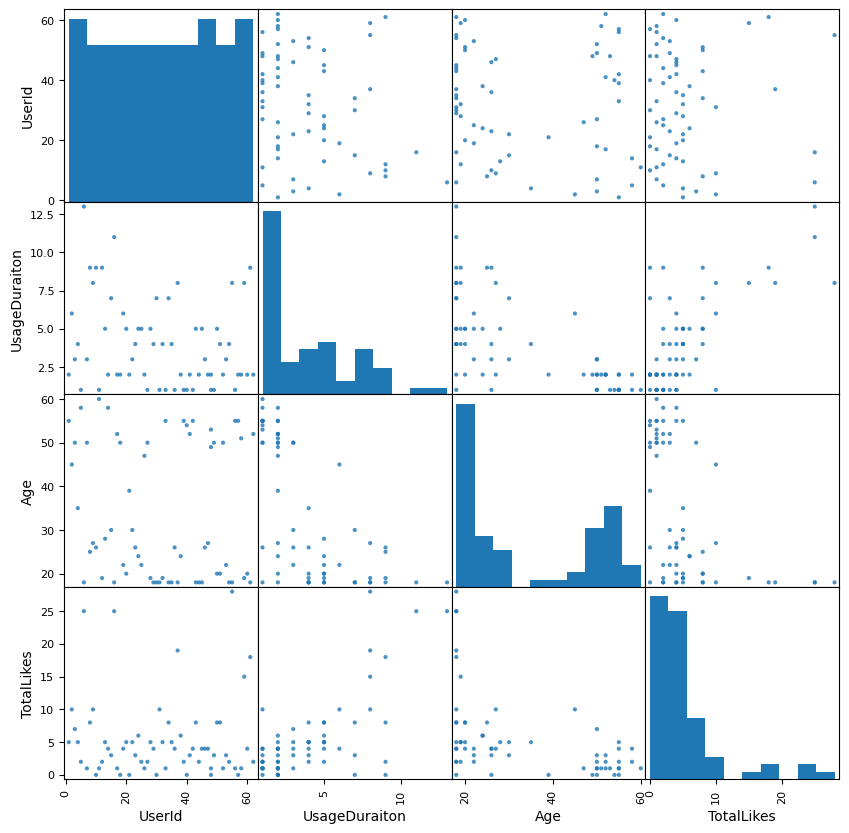

In [4]:
import pandas.plotting as pdplot

pdplot.scatter_matrix(df1, figsize=(10, 10), diagonal='hist', alpha=0.8)

In [15]:
import sklearn.model_selection as sklearn

X = df1.drop('UsageDuraiton', axis=1)
y = df1['UsageDuraiton']

random_train_set, random_test_set = sklearn.train_test_split(X, test_size=0.2, random_state=42)

print({random_train_set.shape})
print({random_test_set.shape})

{(50, 4)}
{(13, 4)}


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False))
])

In [16]:
from sklearn.compose import ColumnTransformer

numerical_cols = random_test_set.columns.tolist()
categorical_cols = df1.columns.tolist()

full_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_cols),
        ('cat', cat_pipeline, categorical_cols)
    ])

train_set_prep = full_pipeline.fit_transform(random_test_set)

num_cols_transformed = num_pipeline.named_steps['scaler'].get_feature_names_out(input_features=numerical_cols)
cat_cols_transformed = cat_pipeline.named_steps['onehot'].get_feature_names_out(input_features=categorical_cols)

all_columns = list(num_cols_transformed) + list(cat_cols_transformed)

df1_prep = pd.DataFrame(df1_prep, columns=all_columns)

ValueError: A given column is not a column of the dataframe

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(df1_prep, df1)

In [ ]:
import numpy as np

from sklearn.metrics import mean_squared_error

df1_pred = lin_reg.predict(df1_prep)

mse = mean_squared_error(df1, df1_pred)

rmse = np.sqrt(mse)

print({rmse})